In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA (Exploratory Data Analysis)

1. Data Cleaning and Preprocessing

In [156]:
# from google.colab import files
# uploaded= files.upload()

In [157]:
# importing the dataset
df = pd.read_csv("solarpowergeneration.csv")

To figure out how many rows and columns are there in our dataset

In [158]:
df.shape

(2920, 10)

for checking of header column in the dataset

In [159]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


As a part of Data Cleaning and Preparation we have to check for Load the dataset into a DataFrame or equivalent data structure.
Handle missing values appropriately (e.g., imputation, deletion).
Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
Detect and treat outliers if necessary.


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [161]:
# As a part of Data cleansing we check the data for missing values/ null values
# null counts for columns
null_count_col = df.isnull().sum().value_counts(ascending=False)
null_count_col

# null percentage for columns
null_per_col =(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)
null_per_col

print("Null counts for columns:\n\n", null_count_col, "/n")
print("Null percentage for columns:\n\n", null_per_col)

Null counts for columns:

 0    9
1    1
Name: count, dtype: int64 /n
Null percentage for columns:

 0.000000    9
0.034247    1
Name: count, dtype: int64


In [162]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [163]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [164]:
#Check for missing value
df.isnull()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False


In [165]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [166]:
df = df.fillna(value=df['average-wind-speed-(period)'].mean())
df['average-wind-speed-(period)'].isnull().sum()

np.int64(0)

In [167]:
df.isnull().sum().sum()

np.int64(0)

###### To clean the data we can remove the outliers for better performance

In [168]:
#  Warnings removal
import warnings
warnings.filterwarnings('ignore')

###Identify Numerical Columns:

In [169]:
numerical_cols = df.select_dtypes(include=np.number).columns

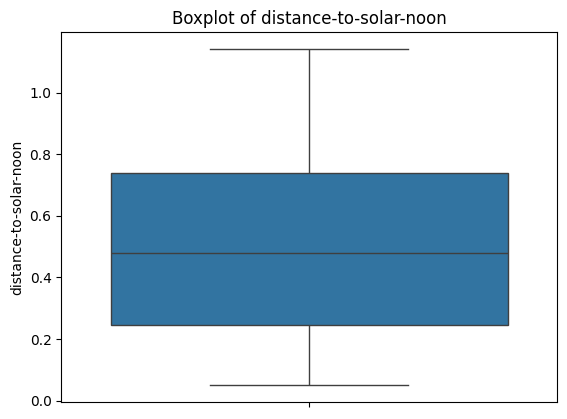

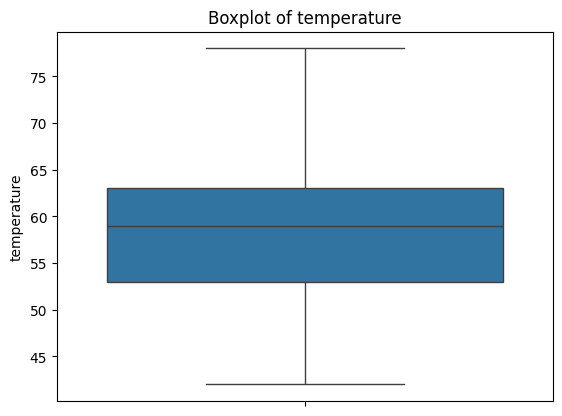

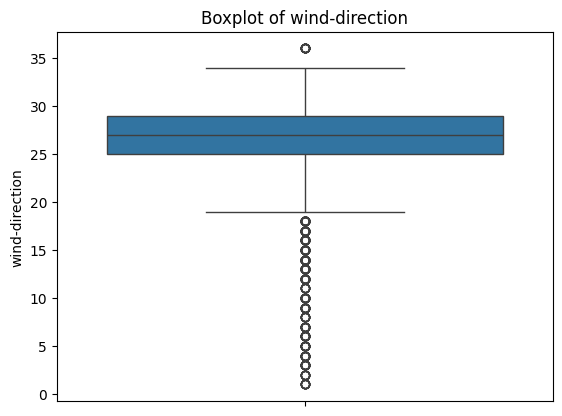

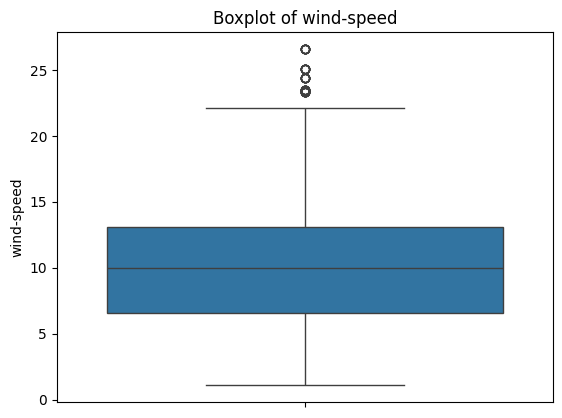

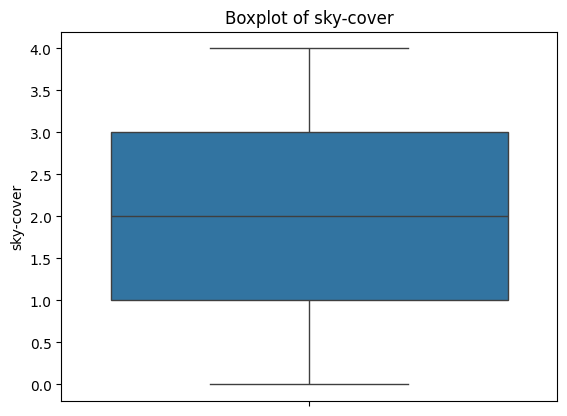

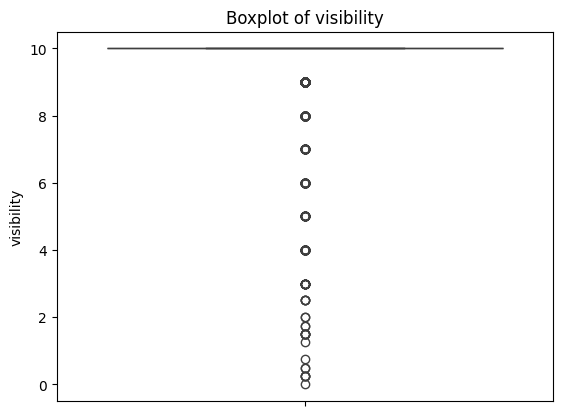

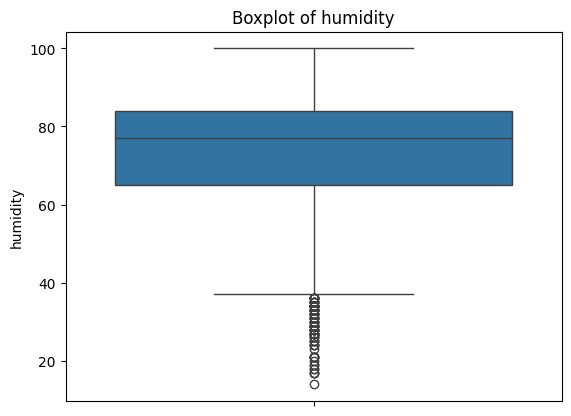

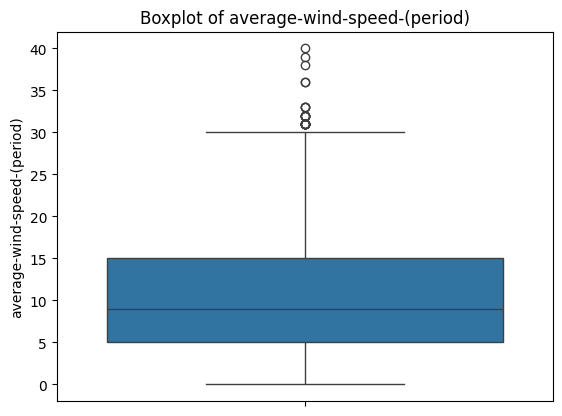

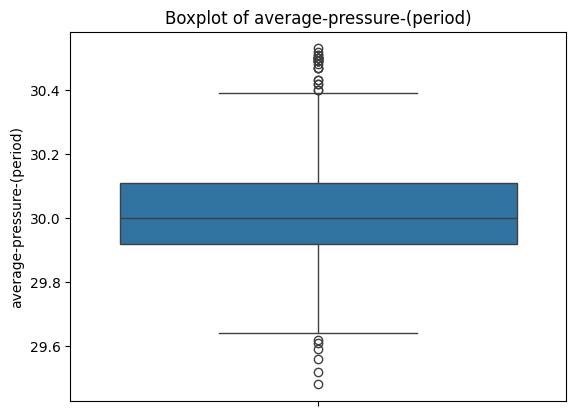

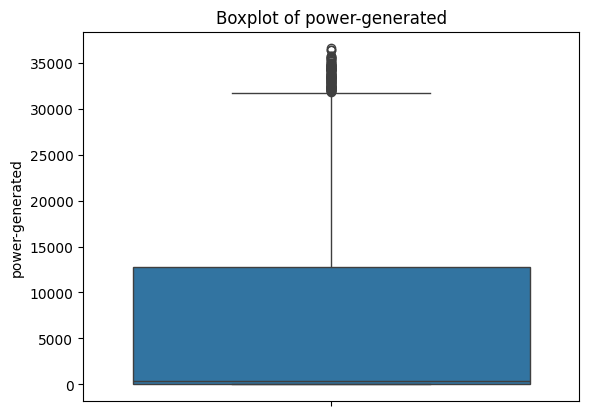

In [170]:
for col in numerical_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [171]:
# using 'Z'scores to remove outliers
upper_limit = df['wind-direction'].mean()+3*df['wind-direction'].std()
lower_limit = df['wind-direction'].mean()-3*df['wind-direction'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)
print('outliers:', upper_limit-lower_limit)

upper limit: 45.6989586625041
lower limit: 4.207890652564391
outliers: 41.49106800993971


In [172]:
#finding the outliers
df.loc[(df['wind-direction']>upper_limit) | (df['wind-direction']<lower_limit)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
768,1.036207,51,3,3.6,1,10.0,68,0.0,30.22,0
769,0.725862,51,3,3.6,0,10.0,74,0.0,30.21,0
770,0.415517,51,3,3.6,1,10.0,86,0.0,30.24,110
771,0.105172,51,3,3.6,1,8.0,77,7.0,30.26,13734
772,0.205172,51,3,3.6,1,7.0,62,0.0,30.21,20887
...,...,...,...,...,...,...,...,...,...,...
1147,0.134551,53,2,2.6,4,4.0,96,0.0,30.02,120
1148,0.164452,53,2,2.6,4,4.0,93,7.0,30.00,4956
1149,0.463455,53,2,2.6,4,8.0,93,0.0,30.00,2298
1150,0.762458,53,2,2.6,4,9.0,93,0.0,30.00,0


In [173]:
# Trimming - delete the outliered data
df1= df.loc[(df['wind-direction']<upper_limit)&(df['wind-direction']>lower_limit)]
print(df1)

      distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                

<Axes: ylabel='wind-direction'>

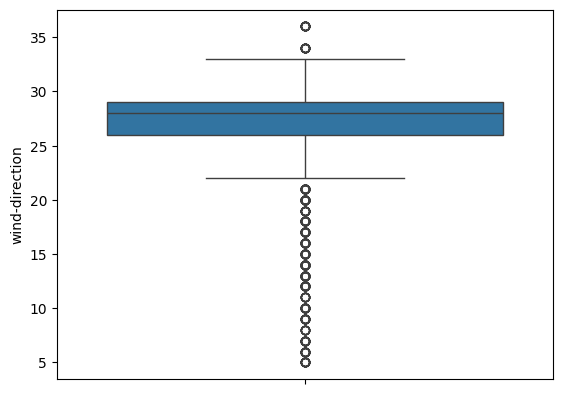

In [174]:
sns.boxplot(df1['wind-direction'])

In [175]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [176]:
df['distance-to-solar-noon'].std()
print('standard deviation of distance-to-solar-noon:',df['distance-to-solar-noon'].std())
df['temperature'].std()
print('standard deviation of temperature:',df['temperature'].std())
df['wind-direction'].std()
print('standard deviation of wind-direction:',df['wind-direction'].std())
df['wind-speed'].std()
print('standard deviation of wind-speed:',df['wind-speed'].std())
df['sky-cover'].std()
print('standard deviation of sky-cover:',df['sky-cover'].std())
df['visibility'].std()
print('standard deviation of visibility:',df['visibility'].std())
df['humidity'].std()
print('standard deviation of humidity:',df['humidity'].std())
df['average-wind-speed-(period)'].std()
print('standard deviation of average-wind-speed-(period):',df['average-wind-speed-(period)'].std())
df['average-pressure-(period)'].std()
print('standard deviation of average-pressure-(period):',df['average-pressure-(period)'].std())
df['power-generated'].std()
print('standard deviation of power-generated:',df['power-generated'].std())

standard deviation of distance-to-solar-noon: 0.29802354400173364
standard deviation of temperature: 6.841200312039008
standard deviation of wind-direction: 6.915178001656619
standard deviation of wind-speed: 4.838185069335698
standard deviation of sky-cover: 1.4119778518284123
standard deviation of visibility: 1.3838837251315257
standard deviation of humidity: 15.07713923327884
standard deviation of average-wind-speed-(period): 7.260302575948544
standard deviation of average-pressure-(period): 0.14200583367403716
standard deviation of power-generated: 10312.336413252266


In [177]:
(df['wind-direction']).describe()

count    2920.000000
mean       24.953425
std         6.915178
min         1.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: wind-direction, dtype: float64

In [178]:
# # Data visualization is main part to compare a data with more information
# df.boxplot();

there was no categorical column to display with the help of pie chart

In [179]:
# #Detect and treat outliers
# # Visualize outliers using boxplots
# for col in numerical_cols:
#     plt.figure()
#     sns.boxplot(df[col])
#     plt.title(f"Boxplot of {col}")
#     plt.show()

In [180]:
# # Treat outliers using the 5th and 95th percentile capping
# for col in numerical_cols:
#     lower_bound = df[col].quantile(0.05)
#     upper_bound = df[col].quantile(0.95)
#     df[col] = np.clip(df[col], lower_bound, upper_bound)

In [181]:
# #Boxplot
# for col in numerical_cols:
#     plt.figure()
#     sns.boxplot(df[col])
#     plt.title(f"Boxplot of df[col]")
#     plt.show()

In [182]:
# sns.boxplot(df)

In [183]:
q1_power_generated = df['power-generated'].quantile(0.25)
q3_power_generated = df['power-generated'].quantile(0.75)
iqr_power_generated = q3_power_generated - q1_power_generated

In [184]:
upper_limit_power_generated = q3_power_generated + (1.5 * iqr_power_generated)
lower_limit_power_generated = q1_power_generated - (1.5 * iqr_power_generated)
print('upper limit_power-generated', upper_limit_power_generated)
print('lower limit_power-generated', lower_limit_power_generated)

upper limit_power-generated 31808.75
lower limit_power-generated -19085.25


In [185]:
df= df.loc[(df['power-generated']<upper_limit_power_generated)&(df['power-generated']>lower_limit_power_generated)]

In [186]:
# sns.boxplot(df['power-generated'])

In [187]:
# df.boxplot(figsize=(10,10))

# Generate the scatter plots or correlation heatmaps to explore relationships between the pairs of variables.

# Histograms

In [188]:
# df.hist();

In [189]:
# #Histogram
# for col in numerical_cols:
#     plt.figure()
#     sns.histplot(df[col], kde=True)
#     plt.title(f"Histogram of {col}")
#     plt.show()

# Line plot

In [190]:
# plt.figure(figsize=(10, 6))
# # Replace 'distance-to-solar-noon' and 'power-generated' with the columns you want to plot
# plt.plot(df['distance-to-solar-noon'], df['power-generated'])
# plt.xlabel('Distance to Solar Noon')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [191]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['temperature'], df['power-generated'])
# plt.xlabel('temperature')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [192]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['wind-direction'], df['power-generated'])
# plt.xlabel('wind-direction')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [193]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['wind-speed'], df['power-generated'])
# plt.xlabel('wind-speed')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [194]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['sky-cover'], df['power-generated'])
# plt.xlabel('sky-cover')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [195]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['visibility'], df['power-generated'])
# plt.xlabel('visibility')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [196]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['humidity'], df['power-generated'])
# plt.xlabel('humidity')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [197]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['average-wind-speed-(period)'], df['power-generated'])
# plt.xlabel('average-wind-speed-(period)')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [198]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['average-pressure-(period)'], df['power-generated'])
# plt.xlabel('average-pressure-(period)')
# plt.ylabel('Power Generated')
# plt.title('Line Plot')
# plt.show()

In [199]:
# plt.figure(figsize=(10, 6))
# plt.plot(df['power-generated'], df['power-generated'])
# plt.xlabel('Power Generated')
# plt.ylabel('power-generated')
# plt.title('Line Plot')
# plt.show()

In [200]:
columns_to_plot = ['distance-to-solar-noon' , 'temperature' , 'wind-direction' , 'wind-speed' , 'sky-cover' , 'visibility' , 'humidity' , 'average-wind-speed-(period)' , 'average-pressure-(period)']

In [201]:
# for column in columns_to_plot:
#     plt.plot(df[column], df['power-generated'], label=column)
#     plt.xlabel('X-axis')
# plt.ylabel('Power Generated')
# plt.title('Scatter Plot of Multiple Columns')
# plt.legend()
# plt.show()

# Scatter plot

In [202]:
# # 2. Scatter Plot for Multiple Columns
# plt.figure(figsize=(10, 6))

# for column in columns_to_plot:
#     plt.scatter(df[column], df['power-generated'], label=column)

# plt.xlabel('X-axis')
# plt.ylabel('Power Generated')
# plt.title('Scatter Plot of Multiple Columns')
# plt.legend()
# plt.show()

In [203]:
# 3. Using Seaborn for Multiple Line Plots
# Seaborn makes it easier to plot multiple columns with a single line of code
# sns.pairplot(df, x_vars=columns_to_plot, y_vars=['power-generated'], kind='reg')  # 'reg' adds regression lines
# plt.figure(figsize=(8, 6))
# plt.show()

#Boxplots
## feature vs target

In [204]:
# # Create subplots to arrange box plots
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 6 * len(columns_to_plot)))

# # Iterate through columns and create box plots
# for i, column in enumerate(columns_to_plot):
#     sns.boxplot(x=df[column], y=df['power-generated'], ax=axes[i])  # Box plot using Seaborn
#     axes[i].set_xlabel(column)  # Set x-axis label
#     axes[i].set_ylabel('Power Generated')  # Set y-axis label
#     axes[i].set_title(f'Box Plot of Power Generated vs {column}')  # Set title

# plt.tight_layout()  # Adjust spacing between subplots
# plt.show()

# Bar plots

In [205]:
# fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 6 * len(columns_to_plot)))

# # Iterate through columns and create bar plots
# for i, column in enumerate(columns_to_plot):
#     # Group data by the current column and calculate mean power-generated for each group
#     grouped_data = df.groupby(column)['power-generated'].mean().reset_index()

#     axes[i].bar(grouped_data[column], grouped_data['power-generated'])
#     axes[i].set_xlabel(column)  # Set x-axis label
#     axes[i].set_ylabel('Power Generated')  # Set y-axis label
#     axes[i].set_title(f'Bar Plot of Power Generated vs. {column}')  # Set title

# plt.tight_layout()  # Adjust spacing between subplots
# plt.show()

# 3d Scatterplots

In [206]:
#  # 3D Plot (Example with 3 features)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Select three features for the 3D plot
# x = df['distance-to-solar-noon']
# y = df['temperature']
# z = df['power-generated']

# ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points based on 'power-generated'

# ax.set_xlabel('Distance to Solar Noon')
# ax.set_ylabel('Temperature')
# ax.set_zlabel('Power Generated')
# ax.set_title('3D Scatter Plot')

# plt.show()

In [207]:
# # 3D Plot (Example with 3 features)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Select three features for the 3D plot
# x = df['wind-direction']
# y = df['wind-speed']
# z = df['power-generated']

# ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points based on 'power-generated'

# ax.set_xlabel('wind-direction')
# ax.set_ylabel('wind-speed')
# ax.set_zlabel('Power Generated')
# ax.set_title('3D Scatter Plot')

# plt.show()

In [208]:
# # 3D Plot (Example with 3 features)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Select three features for the 3D plot
# x = df['sky-cover']
# y = df['visibility']
# z = df['power-generated']

# ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points based on 'power-generated'

# ax.set_xlabel('sky-cover')
# ax.set_ylabel('visibility')
# ax.set_zlabel('Power Generated')
# ax.set_title('3D Scatter Plot')

# plt.show()

In [209]:
# # 3D Plot (Example with 3 features)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Select three features for the 3D plot
# x = df['humidity']
# y = df['average-wind-speed-(period)']
# z = df['power-generated']

# ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points based on 'power-generated'

# ax.set_xlabel('humidity')
# ax.set_ylabel('average-wind-speed-(period)')
# ax.set_zlabel('Power Generated')
# ax.set_title('3D Scatter Plot')

# plt.show()

In [210]:
# # 3D Plot (Example with 3 features)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Select three features for the 3D plot
# x = df['average-pressure-(period)']
# y = df['power-generated']
# z = df['power-generated']

# ax.scatter(x, y, z, c=z, cmap='viridis')  # Color points based on 'power-generated'

# ax.set_xlabel('average-pressure-(period)')
# ax.set_ylabel('Power Generated')
# ax.set_zlabel('Power Generated')
# ax.set_title('3D Scatter Plot')

# plt.show()

# Boxplots

In [211]:
# melted_df = pd.melt(df, id_vars=['power-generated'], var_name='Column', value_name='Value')

# # Create the boxplots using seaborn
# plt.figure(figsize=(15, 10))  # Adjust figure size as needed
# sns.boxplot(x='Column', y='Value', hue='power-generated', data=melted_df)
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
# plt.title('Boxplots of All Columns vs Power Generated')
# plt.tight_layout()
# plt.show()

# All pairplots of dataset

In [212]:
# sns.pairplot(df)
# plt.show()

# Correlation Matrix

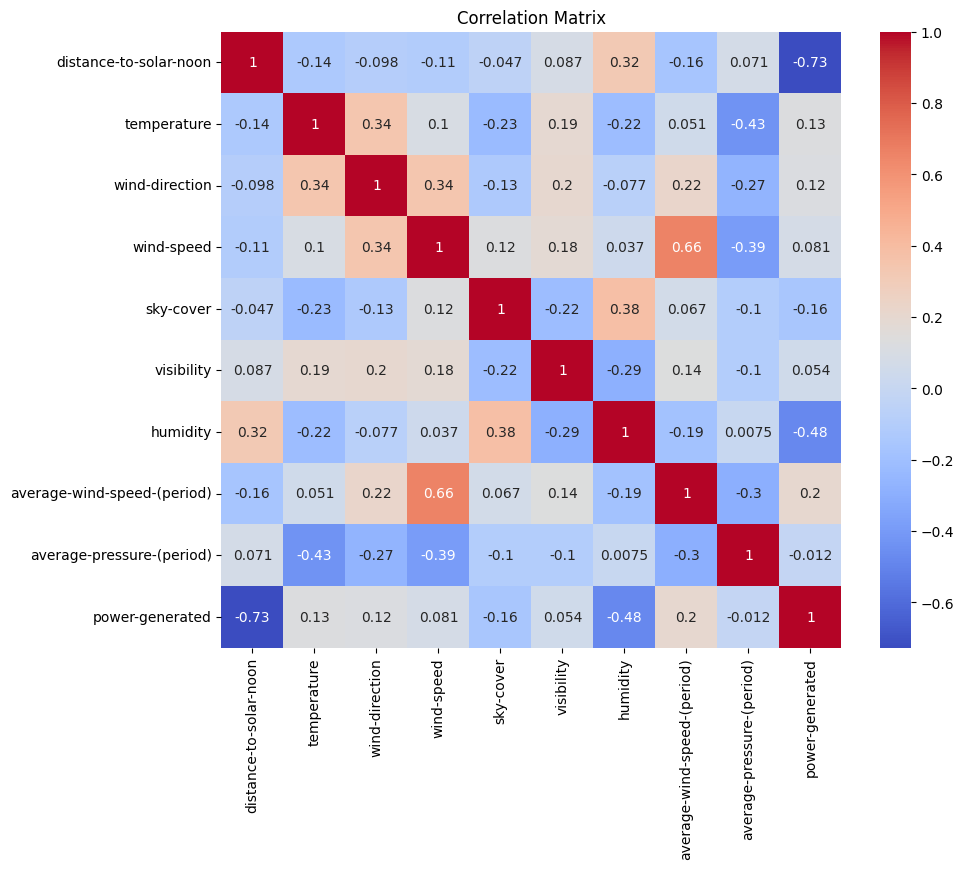

In [213]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [214]:
correlation_matrix= df.corr()
correlation_matrix

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.138556,-0.097746,-0.110017,-0.047483,0.087183,0.324268,-0.163517,0.071144,-0.726340
temperature,-0.138556,1.000000,0.341851,0.101848,-0.228630,0.194071,-0.216624,0.050674,-0.430741,0.127488
wind-direction,-0.097746,0.341851,1.000000,0.340087,-0.129222,0.199800,-0.077375,0.221700,-0.270192,0.120706
wind-speed,-0.110017,0.101848,0.340087,1.000000,0.123732,0.180561,0.036881,0.660977,-0.390898,0.081047
sky-cover,-0.047483,-0.228630,-0.129222,0.123732,1.000000,-0.220570,0.383072,0.066767,-0.100183,-0.159621
visibility,0.087183,0.194071,0.199800,0.180561,-0.220570,1.000000,-0.288095,0.135443,-0.104205,0.053870
humidity,0.324268,-0.216624,-0.077375,0.036881,0.383072,-0.288095,1.000000,-0.185128,0.007533,-0.482750
average-wind-speed-(period),-0.163517,0.050674,0.221700,0.660977,0.066767,0.135443,-0.185128,1.000000,-0.297192,0.199320
average-pressure-(period),0.071144,-0.430741,-0.270192,-0.390898,-0.100183,-0.104205,0.007533,-0.297192,1.000000,-0.012404
power-generated,-0.726340,0.127488,0.120706,0.081047,-0.159621,0.053870,-0.482750,0.199320,-0.012404,1.000000


##Feature engineering

In [215]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


Model building

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,classification_report
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor

In [217]:
x = df.drop('power-generated',axis=1)
y = df['power-generated']

In [218]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.80,random_state=100)

In [219]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 9)
(563, 9)
(2250,)
(563,)


In [220]:
scaler = StandardScaler()

In [221]:
x_train_scaled = scaler.fit_transform(x_train)

In [222]:
x_test_scaled = scaler.transform(x_test)

In [223]:
models = []

names = [
    "lgb.LGBMRegressor()",
    "DecisionTreeRegressor",
    "BaggingRegressor",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "AdaBoostRegressor",
    "xgb.XGBRegressor"
]

scores = []
r2_square_v=[]
mae_v=[]
mse_v=[]
rmse_v=[]

clf = [
    lgb.LGBMRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(n_estimators=40),
    GradientBoostingRegressor(n_estimators=70),
    AdaBoostRegressor(n_estimators=50),
    xgb.XGBRegressor()  

]

In [224]:
for model in clf:
    model.fit(x_train_scaled, y_train)
    score = model.score(x_test_scaled, y_test)
    scores.append(score)
 
final_scores = pd.DataFrame(zip(names,scores), columns=['Regressor', 'Accuracy'])

final_scores.sort_values(by='Accuracy',ascending=False).style.background_gradient(cmap="tab10").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'Brown',
            'font-size': '15px'
        })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 683
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 9
[LightGBM] [Info] Start training from score 5990.674667


,Regressor,Accuracy
2,BaggingRegressor,0.913635
0,lgb.LGBMRegressor(),0.913083
3,RandomForestRegressor,0.909308
5,AdaBoostRegressor,0.902013
1,DecisionTreeRegressor,0.895436
4,GradientBoostingRegressor,0.825700


In [225]:
for model in clf:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    mae = metrics.mean_absolute_error(y_test, y_test_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    mse = metrics.mean_squared_error(y_test, y_test_pred)
    r2_square = metrics.r2_score(y_test, y_test_pred)
    r2_square_v.append(r2_square)
    mae_v.append(mae)
    rmse_v.append(rmse)
    mse_v.append(mse)
 
final_scores = pd.DataFrame(zip(names,r2_square_v,mae_v,mse_v,rmse_v), columns=['Regressor', 'r2_square','mae','mse','rmse'])

final_scores.sort_values(by='r2_square',ascending=False).style.background_gradient(cmap="tab10").set_properties(**{
            'font-family': 'Comic Sans MS',
            'color': 'Brown',
            'font-size': '15px'
        })

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000137 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 9
[LightGBM] [Info] Start training from score 5990.674667


,Regressor,r2_square,mae,mse,rmse
0,lgb.LGBMRegressor(),0.913880,1302.711291,6892268.578364,2625.313044
2,BaggingRegressor,0.913009,1272.509147,6961991.147433,2638.558536
3,RandomForestRegressor,0.909521,1477.477179,7241131.681965,2690.935094
5,AdaBoostRegressor,0.902013,1377.470010,7841990.325039,2800.355393
1,DecisionTreeRegressor,0.900249,1350.860746,7983152.598259,2825.447327
4,GradientBoostingRegressor,0.839104,2059.769299,12876599.984727,3588.397969


In [226]:
lgbm_reg = lgb.LGBMRegressor()
lgbm_reg.fit(x_train, y_train) 
# predicting on the test dataset 
y_pred = lgbm_reg.predict(x_test) 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 2250, number of used features: 9
[LightGBM] [Info] Start training from score 5990.674667


In [227]:
# pickling the model 
import pickle 
pickle_out = open("lgbm_reg.pkl", "wb") 
pickle.dump(lgbm_reg, pickle_out) 
pickle_out.close()